# Profiling des datasets *Données hospitalières relatives à la Covid-19*

Dans ce notebook, on évalue l'exploitabilité du jeu de données *Données hospitalières relatives à l'épidémie de COVID-19* (https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/) par des algorithmes de Machine Learning. 5 datasets différents sont proposés contenant des données sur les hospitalisations, les réanimations et les décès, regroupés par région, puis par département et par sexe, par département, par classe d'âge et par établissement.
Ces datasets présentent un grand intérêt général et ont été très exploités par les utilisateurs.

In [3]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
import requests

### Import des jeux de données

#### Hospitalisations par region

In [1]:
#url_reg = "https://www.data.gouv.fr/fr/datasets/r/a1466f7f-4ece-4158-a373-f5d4db167eb0"
#r = requests.get(url_reg,allow_redirects=True)
#data_reg = pd.read_csv(io.StringIO(r.content.decode('latin-1')), sep=';') #dataframe par region 

#### Hospitalisation, décès et réanimation par sexe et département

In [2]:
#url_sex_dep = "https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7"
#r = requests.get(url_sex_dep,allow_redirects=True)
#data_sex_dep=pd.read_csv(io.StringIO(r.content.decode('latin-1')), sep=';') #dataframe par sexe et departement

#### Hospitalisations, réanimation et décès par département

In [3]:
#url_dep = "https://www.data.gouv.fr/fr/datasets/r/6fadff46-9efd-4c53-942a-54aca783c30c"
#r = requests.get(url_dep,allow_redirects=True)
#data_dep=pd.read_csv(io.StringIO(r.content.decode('latin-1')), sep=';')  #dataframe par département

#### Par classes d'age 

In [4]:
#url_age = "https://www.data.gouv.fr/fr/datasets/r/08c18e08-6780-452d-9b8c-ae244ad529b3"
#r = requests.get(url_age,allow_redirects=True)
#data_age=pd.read_csv(io.StringIO(r.content.decode('latin-1')), sep=';')  #dataframe par classe d'age

#### Par établissement

In [5]:
#url_etab = "https://www.data.gouv.fr/fr/datasets/r/41b9bd2a-b5b6-4271-8878-e45a8902ef00"
#r = requests.get(url_etab,allow_redirects=True)
#data_etab=pd.read_csv(io.StringIO(r.content.decode('latin-1')), sep=';')  #dataframe par établissement

## Profiling du dataset par region

Voici un aperçu complet du dataset:

In [6]:
#profile_reg = data_reg.profile_report()
#profile_reg.to_file('a1466f7f-4ece-4158-a373-f5d4db167eb0.html')

**Histogrammes de chaque colonne**

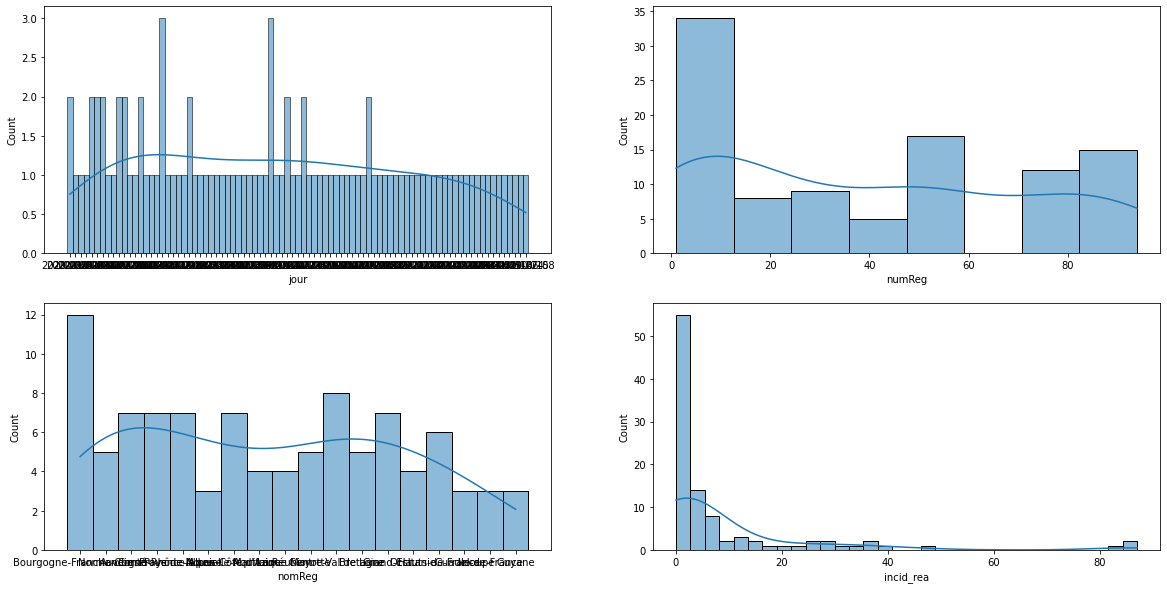

In [8]:
n_rows = 2
n_cols = 2
fig, axs = plt.subplots(n_rows,n_cols,figsize=(20,10))
for i,col in enumerate(data_reg.columns):
  sns.histplot(data_reg.sample(100), x=col, kde=True, ax=axs[i%n_rows,i//n_rows])

## Profiling du dataset par sexe et département

Voici un aperçu complet du dataset:

In [7]:
#profile_sex_dep = data_sex_dep.profile_report()
#profile_sex_dep.to_file('63352e38-d353-4b54-bfd1-f1b3ee1cabd7.html')

**Histogrammes de chaque colonne**

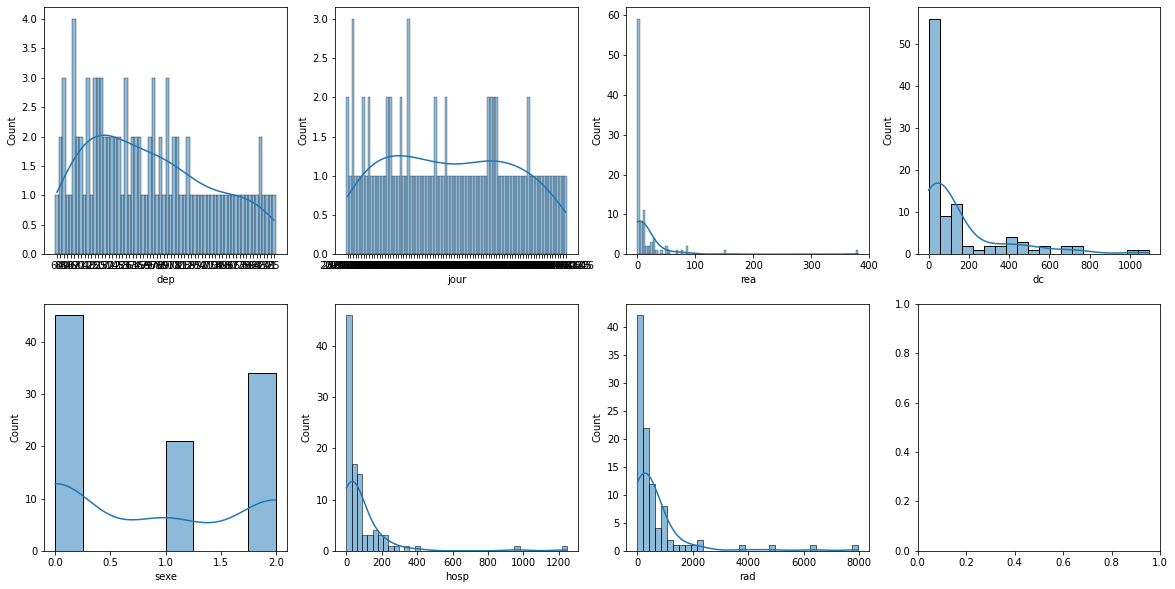

In [12]:
n_rows = 2
n_cols = 4
fig, axs = plt.subplots(n_rows,n_cols,figsize=(20,10))
for i,col in enumerate(data_sex_dep.columns):
  sns.histplot(data_sex_dep.sample(100), x=col, kde=True, ax=axs[i%n_rows,i//n_rows])

## Profiling du dataset par département

Voici un aperçu complet du dataset:

In [8]:
#profile_dep = data_dep.profile_report()
#profile_dep.to_file('6fadff46-9efd-4c53-942a-54aca783c30c.html')

**Histogrammes de chaque colonne**

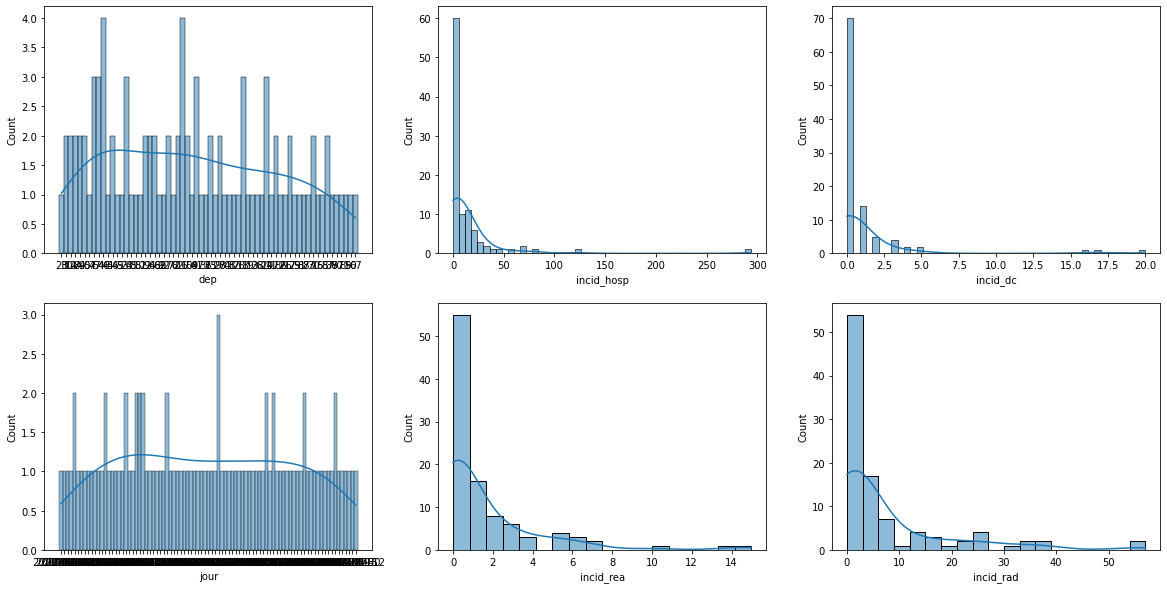

In [19]:
n_rows = 2
n_cols = 3
fig, axs = plt.subplots(n_rows,n_cols,figsize=(20,10))
for i,col in enumerate(data_dep.columns):
  sns.histplot(data_dep.sample(100), x=col, kde=True, ax=axs[i%n_rows,i//n_rows])

## Profiling du dataset par age

Voici un aperçu complet du dataset:

In [9]:
#profile_age = data_age.profile_report()
#profile_age.to_file('08c18e08-6780-452d-9b8c-ae244ad529b3.html')

**Histogrammes de chaque colonne**

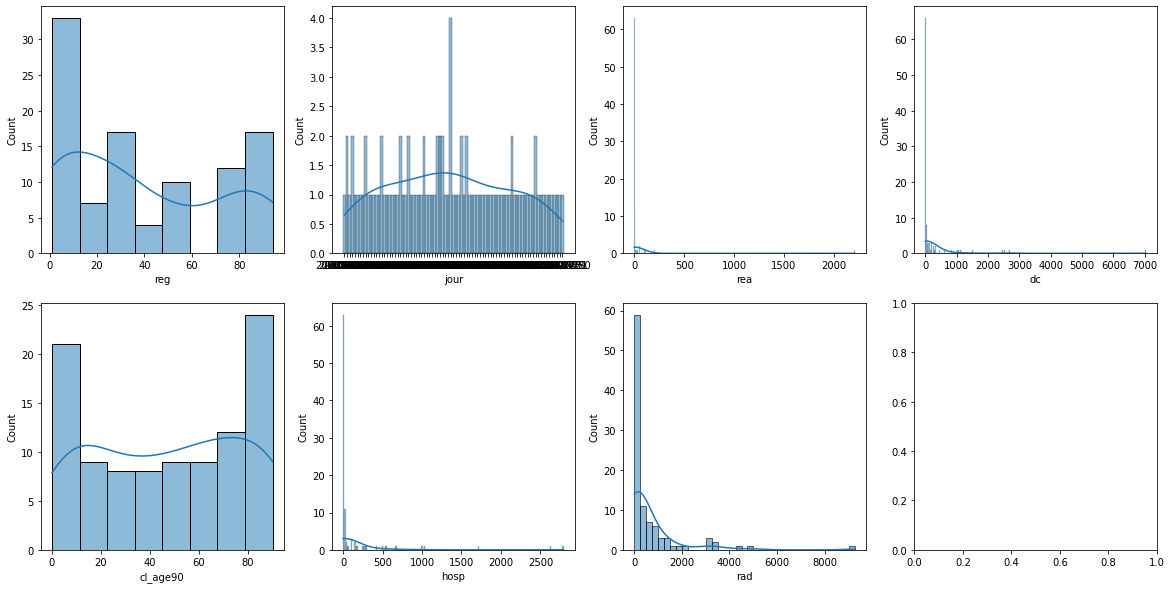

In [21]:
n_rows = 2
n_cols = 4
fig, axs = plt.subplots(n_rows,n_cols,figsize=(20,10))
for i,col in enumerate(data_age.columns):
  sns.histplot(data_age.sample(100), x=col, kde=True, ax=axs[i%n_rows,i//n_rows])

## Profiling par étabissement

Voici un aperçu complet du dataset:

In [10]:
#profile_etab = data_etab.profile_report()
#profile_etab.to_file('41b9bd2a-b5b6-4271-8878-e45a8902ef00.html')

# Analyse de l'exploitabilité des datasets

Globalement, dans tous les datasets, il y a:
- un nombre de lignes (de l'ordre de $10^4$) suffisant pour faire du ML; un faible nombre de variables (entre 3 et 7 par dataset)
- un bon équilibre entre variables catégorielles et numériques
- classes équilibrées pour le sexe; attention pour les classes d'age, seulement la classes des +90 ans est présente
- peu de valeurs manquantes


Ces datasets se prêtent bien pour des algorithmes d'apprentissage supervisé.

Ces datasets pourraient éventuellement être concatenés entre eux ou couplés à d’autres datasets et aider à prévoir l’évolution de l’épidemie par un modèle de séries temporelles ou permettre de répondre à des questions telles que: est-ce que les femmes sont plus touchées que les hommes par la maladie?